**<h1><center>Covid-19 Vaccination Visualization
<br>Data Visualization , Summer 2022</h1>**

**Name: Anitha Ganapathy** <br>
**Email: aganapa@iu.edu** <br>


___

# Data source
- https://ourworldindata.org/covid-vaccinations
- https://github.com/owid/covid-19-data/tree/master/public/data/vaccinations


**Kaggle Visualization**
- https://github.com/Thanya727/Project/blob/main/AlterDimeProject.ipynb
- Bar Chart Race: COVID-19 World Vaccination   
  - https://www.kaggle.com/code/mustafacicek/bar-chart-race-covid-19-world-vaccination

- https://www.kaggle.com/code/tanavbajaj/covid-info-and-analysis
- https://www.kaggle.com/code/aliderakhshesh/time-series-with-ml
- https://www.kaggle.com/code/mohammedomda/eda-for-covid-19-vaccinations-race-during-2021
- https://www.kaggle.com/code/theyazilimci/covid-world-vaccination-analysis
- https://www.kaggle.com/code/saumilagrawal10/simple-exploratory-data-analysis-beginner

# Install packages

In [1]:
import datetime

start_time = datetime.datetime.now()

In [2]:
!pip install chart_studio

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [3]:
!pip install pycountry

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [4]:
# Data pre-processing libraries
import pandas as pd
import numpy as np

# Data Visulaisation
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objs as go
import chart_studio.plotly as py

# Make Plotly work in your Jupyter Notebook
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected = True)

import cufflinks as cf
cf.go_offline(connected=True) # plotly also serves online, but we are using just a sample
# Allows us to create graph objects for making more customized plots
import plotly.graph_objects as go

%matplotlib inline
# Use Plotly locally
cf.go_offline()



import matplotlib.ticker as ticker
from matplotlib.patches import Patch
from matplotlib.offsetbox import OffsetImage,AnnotationBbox
from matplotlib.animation import FuncAnimation
from IPython.display import HTML

from PIL import Image
import urllib
import pycountry

In [5]:
from google.colab import drive

drive.mount('/content/drive')  

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [6]:
dirpath = '/content/drive/MyDrive/Data/vaccinations/'
!ls $dirpath

countries_continents_codes_flags_url.csv


## Unused datatsets

In [7]:
# url_loc_age       = 'https://raw.githubusercontent.com/owid/covid-19-data/master/public/data/vaccinations/locations-age.csv'	    
# url_loc           = 'https://raw.githubusercontent.com/owid/covid-19-data/master/public/data/vaccinations/locations.csv'
# url_loc_manuf     = 'https://raw.githubusercontent.com/owid/covid-19-data/master/public/data/vaccinations/locations-manufacturer.csv'  


# df_loc_age       = pd.read_csv(url_loc_age      ) # has only the source locations for each country : NO USE
# df_loc           = pd.read_csv(url_loc          ) # country, iso_code with list of vaccines used by that country : NO USE
# df_loc_manuf     = pd.read_csv(url_loc_manuf    ) # has only the source locations for each country : NO USE



## Datasets download

In [8]:
url_vacc_age_grp  = 'https://raw.githubusercontent.com/owid/covid-19-data/master/public/data/vaccinations/vaccinations-by-age-group.csv'
url_vacc_manuf    = 'https://raw.githubusercontent.com/owid/covid-19-data/master/public/data/vaccinations/vaccinations-by-manufacturer.csv'
url_us_state_vacc = 'https://raw.githubusercontent.com/owid/covid-19-data/master/public/data/vaccinations/us_state_vaccinations.csv'
url_vaccination   = 'https://raw.githubusercontent.com/owid/covid-19-data/master/public/data/vaccinations/vaccinations.csv'

df_vacc_age_grp  = pd.read_csv(url_vacc_age_grp ) 
df_vacc_manuf    = pd.read_csv(url_vacc_manuf   )  
df_us_state_vacc = pd.read_csv(url_us_state_vacc) 
df_vaccination   = pd.read_csv(url_vaccination  ) 

# EDA

## Vaccinations Manufacturer

In [9]:
print(df_vacc_age_grp.shape)
print(df_vacc_manuf.shape)   
print(df_us_state_vacc.shape)

(44665, 6)
(41503, 4)
(35364, 16)


In [10]:
df_vacc_manuf.head(5)

,location,date,vaccine,total_vaccinations
0,Argentina,2020-12-29,Moderna,2
1,Argentina,2020-12-29,Oxford/AstraZeneca,7
2,Argentina,2020-12-29,Pfizer/BioNTech,1
3,Argentina,2020-12-29,Sinopharm/Beijing,3
4,Argentina,2020-12-29,Sputnik V,20485


In [11]:
# create a df for USA and reset the index
usa_vaccines = df_vacc_manuf[df_vacc_manuf['location'] == 'United States']
usa_vaccines.reset_index(inplace=True)
usa_vaccines = usa_vaccines.drop(['index'], axis = 1)


usa_vaccines['date'] =  pd.to_datetime(usa_vaccines['date'],format='%Y-%m-%d')
usa_vaccines['year'] = pd.DatetimeIndex(usa_vaccines['date']).year
usa_vaccines['month'] = pd.DatetimeIndex(usa_vaccines['date']).month
usa_vaccines_agg = usa_vaccines.groupby(['year', 'month', 'vaccine'],  as_index=False).sum()
usa_vaccines_agg = usa_vaccines_agg.reset_index()
usa_vaccines_agg = usa_vaccines_agg.drop(['index'], axis = 1)
usa_vaccines = usa_vaccines.set_index('date')
# usa_vaccines
usa_vaccines_agg.head()

,year,month,vaccine,total_vaccinations
0,2021,1,Moderna,145780550
1,2021,1,Pfizer/BioNTech,182347381
2,2021,2,Moderna,679282388
3,2021,2,Pfizer/BioNTech,733344102
4,2021,3,Johnson&Johnson,46980647


In [12]:
# Place bars next to each other
fig = px.bar(usa_vaccines, x=['year'], y="total_vaccinations",
            color = 'vaccine',  barmode='group')
# Put bar total value above bars with 2 values of precision
fig.update_traces(texttemplate='%{text:.2s}', textposition='outside')
# Set fontsize and uniformtext_mode='hide' says to hide the text if it won't fit
fig.update_layout(uniformtext_minsize=8)
# Go crazy styling the figure
fig.update_layout(
    # Shows gray line without grid, styling fonts, linewidths and more
     template="simple_white",
    xaxis=dict(
        showline=True,
        showgrid=False,
        showticklabels=True,
        linecolor='rgb(180, 180, 180)',
        linewidth=2,
        ticks='outside',
        tickfont=dict(
            family='Arial',
            size=12,
            color='rgb(82, 82, 82)',
        ),
    ),
    # Turn off everything on y axis
    yaxis=dict(
        showline=True,
        showgrid=False,
        zeroline=True,        
        showticklabels=True,
        linewidth=2,
    ),
    autosize=True,
    margin=dict(
        autoexpand=False,
        l=100,
        r=20,
        t=110,
    ),
    showlegend=False,
    plot_bgcolor='white'
)
fig.show(renderer="colab")

In [13]:
usa_vaccines_agg.vaccine.unique()

array(['Moderna', 'Pfizer/BioNTech', 'Johnson&Johnson'], dtype=object)

https://medium.com/@moritzkoerber/how-to-plot-a-grouped-stacked-bar-chart-in-plotly-df1685b83460

In [14]:
fig = go.Figure()

fig.update_layout(
    template="simple_white",
    xaxis=dict(title_text="Year",
              tickfont=dict(
                            family="Arial",
                            size=14,
                            color='#000000'
                           ),
               titlefont=dict(
                              family="Arial",
                              size=22,
                              color='#000000'
                          )
    ),
    yaxis=dict(title_text="Total Population",
               tickfont=dict(
                            family="Arial",
                            size=14,
                            color='#000000'
                           ),
               titlefont=dict(
                              family="Arial",
                              size=20,
                              color='#000000'
                          )
               ),
    
    barmode="stack",
    title_text='Quantity of types of vaccines used in USA',
                 title_x=0.1, 
                  font=dict(
                            family="Arial",
                            size=25,
                            color='#000000'
                           ),                 
)

# colors = ["#2A66DE", "#FFC32B",  '#EF553B']
colors = ["blue", "orange",  'green']

for r, c in zip(usa_vaccines_agg.vaccine.unique(), colors):
    plot_df = usa_vaccines_agg[usa_vaccines_agg.vaccine == r]
    fig.add_trace(
        go.Bar(x=[plot_df.year, plot_df.month], y=plot_df.total_vaccinations, name=r, marker_color=c),
    )

fig.show(renderer="colab")

## Top vaccinated states in USA

In [15]:
df_vacc_manuf.head()

,location,date,vaccine,total_vaccinations
0,Argentina,2020-12-29,Moderna,2
1,Argentina,2020-12-29,Oxford/AstraZeneca,7
2,Argentina,2020-12-29,Pfizer/BioNTech,1
3,Argentina,2020-12-29,Sinopharm/Beijing,3
4,Argentina,2020-12-29,Sputnik V,20485


In [16]:
df_us_state_vacc.head()

,date,location,total_vaccinations,total_distributed,people_vaccinated,people_fully_vaccinated_per_hundred,total_vaccinations_per_hundred,people_fully_vaccinated,people_vaccinated_per_hundred,distributed_per_hundred,daily_vaccinations_raw,daily_vaccinations,daily_vaccinations_per_million,share_doses_used,total_boosters,total_boosters_per_hundred
0,2021-01-12,Alabama,78134.0,377025.0,70861.0,0.15,1.59,7270.0,1.45,7.69,NaN,NaN,NaN,0.207,NaN,NaN
1,2021-01-13,Alabama,84040.0,378975.0,74792.0,0.19,1.71,9245.0,1.53,7.73,5906.0,5906.0,1205.0,0.222,NaN,NaN
2,2021-01-14,Alabama,92300.0,435350.0,80480.0,NaN,1.88,NaN,1.64,8.88,8260.0,7083.0,1445.0,0.212,NaN,NaN
3,2021-01-15,Alabama,100567.0,444650.0,86956.0,0.28,2.05,13488.0,1.77,9.07,8267.0,7478.0,1525.0,0.226,NaN,NaN
4,2021-01-16,Alabama,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7498.0,1529.0,NaN,NaN,NaN


In [17]:
# df_us_state_vacc.dropna(inplace=True, axis=0)
# df_us_state_vacc.head(5)

In [18]:
df = df_us_state_vacc[['date', 'location', 'total_vaccinations']]
df.head()

,date,location,total_vaccinations
0,2021-01-12,Alabama,78134.0
1,2021-01-13,Alabama,84040.0
2,2021-01-14,Alabama,92300.0
3,2021-01-15,Alabama,100567.0
4,2021-01-16,Alabama,NaN


In [19]:
df_grp = df.groupby('location').agg('sum').reset_index()
df_grp

,location,total_vaccinations
0,Alabama,2.011026e+09
1,Alaska,3.415191e+08
2,American Samoa,3.041931e+07
3,Arizona,3.832693e+09
4,Arkansas,1.367181e+09
...,...,...
60,Virginia,5.058435e+09
61,Washington,4.155208e+09
62,West Virginia,7.948391e+08
63,Wisconsin,3.297587e+09


In [20]:
top_vaccinated_states = df_grp.sort_values(['total_vaccinations'], ascending=[False])
top_vaccinated_states = top_vaccinated_states.set_index('location')
top_vaccinated_states.drop(['United States'], inplace=True)
top_vaccinated_states.head(10)

,total_vaccinations
location,
California,1.675269e+10
Texas,1.447476e+10
New York State,1.228569e+10
Florida,1.200428e+10
Pennsylvania,6.570414e+09
North Carolina,5.320203e+09
New Jersey,5.300599e+09
Ohio,5.166899e+09
Virginia,5.058435e+09


In [21]:
# sns.barplot(df_grp.location, df_grp.total_vaccinations)


fig = px.bar(top_vaccinated_states.total_vaccinations[:10], 
            #  color_discrete_sequence=px.colors.qualitative.Antique
             )

fig.update_layout(
    template="simple_white",
    xaxis=dict(title_text="States",
              tickfont=dict(
                            family="Arial",
                            size=14,
                            color='#000000'
                           ),
               titlefont=dict(
                              family="Arial",
                              size=22,
                              color='#000000'
                          )
    ),
    yaxis=dict(title_text="Total Population",
               tickfont=dict(
                            family="Arial",
                            size=14,
                            color='#000000'
                           ),
               titlefont=dict(
                              family="Arial",
                              size=20,
                              color='#000000'
                          )
               ),
  
    title_text='Top 10 vaccinated states in USA',
                 title_x=0.1, 
                  font=dict(
                            family="Arial",
                            size=25,
                            color='#000000'
                           ),
            
                  
)


fig.show(renderer="colab")

## Top vaccinated countries

In [22]:
df_country = df_vacc_manuf.groupby('location').agg('sum')
df_country = df_country.sort_values(['total_vaccinations'], ascending=[False])
df_country.head(10)

,total_vaccinations
location,
European Union,285691063041
United States,182435835711
Japan,79153008710
Germany,58749935488
France,46416657472
Italy,41724528206
South Korea,33907392584
Argentina,29593407437
Peru,18071914517


In [23]:
# sns.barplot(df_grp.location, df_grp.total_vaccinations)


fig = px.bar(df_country.total_vaccinations[:10], 
            #  color_discrete_sequence=px.colors.qualitative.Antique
             )

fig.update_layout(
    template="simple_white",
    xaxis=dict(title_text="Countries",
              tickfont=dict(
                            family="Arial",
                            size=14,
                            color='#000000'
                           ),
               titlefont=dict(
                              family="Arial",
                              size=22,
                              color='#000000'
                          )
    ),
    yaxis=dict(title_text="Total Population",
               tickfont=dict(
                            family="Arial",
                            size=14,
                            color='#000000'
                           ),
               titlefont=dict(
                              family="Arial",
                              size=20,
                              color='#000000'
                          )
               ),
  
    title_text='Top 10 vaccinated countries',
                 title_x=0.1, 
                  font=dict(
                            family="Arial",
                            size=25,
                            color='#000000'
                           ),                  
)

fig.show(renderer="colab")

# World Vaccination Situation

In [24]:
df_vaccination.head()

,location,iso_code,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,total_boosters,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,total_boosters_per_hundred,daily_vaccinations_per_million,daily_people_vaccinated,daily_people_vaccinated_per_hundred
0,Afghanistan,AFG,2021-02-22,0.0,0.0,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,AFG,2021-02-23,NaN,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,NaN,34.0,1367.0,0.003
2,Afghanistan,AFG,2021-02-24,NaN,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,NaN,34.0,1367.0,0.003
3,Afghanistan,AFG,2021-02-25,NaN,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,NaN,34.0,1367.0,0.003
4,Afghanistan,AFG,2021-02-26,NaN,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,NaN,34.0,1367.0,0.003


In [25]:
# df_vaccination.location.unique()

In [26]:
usa_vac = df_vaccination[df_vaccination['location'] == 'United States']
uk_vac = df_vaccination[df_vaccination['location'] == 'United Kingdom']
ger_vac= df_vaccination[df_vaccination['location'] == 'Germany']
ind_vac= df_vaccination[df_vaccination['location'] == 'India']

In [27]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=usa_vac['date'], y=usa_vac['daily_vaccinations'], mode='lines+markers', name='USA'))
fig.add_trace(go.Scatter(x=uk_vac['date'],y=uk_vac['daily_vaccinations'], mode='lines+markers', name='UK'))
fig.add_trace(go.Scatter(x=ger_vac['date'],y=ger_vac['daily_vaccinations'], mode='lines+markers', name='Germany'))
fig.add_trace(go.Scatter(x=ind_vac['date'],y=ind_vac['daily_vaccinations'], mode='lines+markers', name='India'))
fig.update_layout(title='Comparison of Daily Vaccinations' , template='plotly_dark' )
fig.show(renderer="colab")

# Bar Chart Race: COVID-19 World Vaccination

###  Data Preparation

In [28]:
df_vaccination.head()

,location,iso_code,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,total_boosters,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,total_boosters_per_hundred,daily_vaccinations_per_million,daily_people_vaccinated,daily_people_vaccinated_per_hundred
0,Afghanistan,AFG,2021-02-22,0.0,0.0,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,AFG,2021-02-23,NaN,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,NaN,34.0,1367.0,0.003
2,Afghanistan,AFG,2021-02-24,NaN,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,NaN,34.0,1367.0,0.003
3,Afghanistan,AFG,2021-02-25,NaN,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,NaN,34.0,1367.0,0.003
4,Afghanistan,AFG,2021-02-26,NaN,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,NaN,34.0,1367.0,0.003


In [29]:
df_countries = df_vaccination[["date", "location", "daily_vaccinations"]]
df_countries.loc[:, "TotalVaccination"] = df_countries.groupby("location")["daily_vaccinations"].cumsum()
df_countries.head()

,date,location,daily_vaccinations,TotalVaccination
0,2021-02-22,Afghanistan,NaN,NaN
1,2021-02-23,Afghanistan,1367.0,1367.0
2,2021-02-24,Afghanistan,1367.0,2734.0
3,2021-02-25,Afghanistan,1367.0,4101.0
4,2021-02-26,Afghanistan,1367.0,5468.0


In [30]:
pivot = df_countries.pivot(index = "date", columns = "location", values = "TotalVaccination")
pivot.tail()

location,Afghanistan,Africa,Albania,Algeria,Andorra,Angola,Anguilla,Antigua and Barbuda,Argentina,Armenia,...,Uzbekistan,Vanuatu,Venezuela,Vietnam,Wales,Wallis and Futuna,World,Yemen,Zambia,Zimbabwe
date,,,,,,,,,,,,,,,,,,,,,
2022-07-11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,106606633.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7383861.0,NaN
2022-07-12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,106669195.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2022-07-13,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,106729489.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2022-07-14,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,106786480.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2022-07-15,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,106831001.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [31]:
pivot.index = pd.to_datetime(pivot.index)

expanded_df = pivot.asfreq("12H")
expanded_df.tail()

location,Afghanistan,Africa,Albania,Algeria,Andorra,Angola,Anguilla,Antigua and Barbuda,Argentina,Armenia,...,Uzbekistan,Vanuatu,Venezuela,Vietnam,Wales,Wallis and Futuna,World,Yemen,Zambia,Zimbabwe
date,,,,,,,,,,,,,,,,,,,,,
2022-07-13 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,106729489.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2022-07-13 12:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2022-07-14 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,106786480.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2022-07-14 12:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2022-07-15 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,106831001.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [32]:
rank_df = expanded_df.rank(axis = 1, method = "first", ascending = False)

expanded_df = expanded_df.interpolate()
rank_df = rank_df.interpolate()

In [33]:
type(rank_df)

pandas.core.frame.DataFrame

In [34]:
display(expanded_df.tail())

display(rank_df.tail())

location,Afghanistan,Africa,Albania,Algeria,Andorra,Angola,Anguilla,Antigua and Barbuda,Argentina,Armenia,...,Uzbekistan,Vanuatu,Venezuela,Vietnam,Wales,Wallis and Futuna,World,Yemen,Zambia,Zimbabwe
date,,,,,,,,,,,,,,,,,,,,,
2022-07-13 00:00:00,6415580.0,575474868.0,2903217.0,15211248.0,152956.0,20573934.0,24469.0,128804.0,106729489.0,2149955.0,...,55409944.0,309408.0,37861146.0,233932712.0,7318732.0,15924.0,1.215950e+10,857490.0,7383861.0,12024662.0
2022-07-13 12:00:00,6415580.0,575474868.0,2903217.0,15211248.0,152956.0,20573934.0,24469.0,128804.0,106757984.5,2149955.0,...,55409944.0,309408.0,37861146.0,233932712.0,7318732.0,15924.0,1.215950e+10,857490.0,7383861.0,12024662.0
2022-07-14 00:00:00,6415580.0,575474868.0,2903217.0,15211248.0,152956.0,20573934.0,24469.0,128804.0,106786480.0,2149955.0,...,55409944.0,309408.0,37861146.0,233932712.0,7318732.0,15924.0,1.215950e+10,857490.0,7383861.0,12024662.0
2022-07-14 12:00:00,6415580.0,575474868.0,2903217.0,15211248.0,152956.0,20573934.0,24469.0,128804.0,106808740.5,2149955.0,...,55409944.0,309408.0,37861146.0,233932712.0,7318732.0,15924.0,1.215950e+10,857490.0,7383861.0,12024662.0
2022-07-15 00:00:00,6415580.0,575474868.0,2903217.0,15211248.0,152956.0,20573934.0,24469.0,128804.0,106831001.0,2149955.0,...,55409944.0,309408.0,37861146.0,233932712.0,7318732.0,15924.0,1.215950e+10,857490.0,7383861.0,12024662.0


location,Afghanistan,Africa,Albania,Algeria,Andorra,Angola,Anguilla,Antigua and Barbuda,Argentina,Armenia,...,Uzbekistan,Vanuatu,Venezuela,Vietnam,Wales,Wallis and Futuna,World,Yemen,Zambia,Zimbabwe
date,,,,,,,,,,,,,,,,,,,,,
2022-07-13 00:00:00,91.0,13.0,118.0,78.0,164.0,59.0,133.0,186.0,13.0,143.0,...,45.0,165.0,51.0,19.0,80.0,214.0,1.0,153.0,50.0,68.0
2022-07-13 12:00:00,91.0,13.0,118.0,78.0,164.0,59.0,133.0,186.0,12.5,143.0,...,45.0,165.0,51.0,19.0,80.0,214.0,1.0,153.0,50.0,68.0
2022-07-14 00:00:00,91.0,13.0,118.0,78.0,164.0,59.0,133.0,186.0,12.0,143.0,...,45.0,165.0,51.0,19.0,80.0,214.0,1.0,153.0,50.0,68.0
2022-07-14 12:00:00,91.0,13.0,118.0,78.0,164.0,59.0,133.0,186.0,10.5,143.0,...,45.0,165.0,51.0,19.0,80.0,214.0,1.0,153.0,50.0,68.0
2022-07-15 00:00:00,91.0,13.0,118.0,78.0,164.0,59.0,133.0,186.0,9.0,143.0,...,45.0,165.0,51.0,19.0,80.0,214.0,1.0,153.0,50.0,68.0


###  Countries, Flags and some Utils

In [35]:
# country_fil = dirpath + "countries_continents_codes_flags_url.csv"
countries = pd.read_csv("https://raw.githubusercontent.com/Anitha-Ganapathy/Data_Viz/main/countries_continents_codes_flags_url.csv")
countries.head()

,country,images_file,image_url,alpha-2,alpha-3,country-code,iso_3166-2,region,sub-region,intermediate-region,region-code,sub-region-code,intermediate-region-code
0,Afghanistan,Flag_of_Afghanistan.svg,https://upload.wikimedia.org/wikipedia/commons...,AF,AFG,4.0,ISO 3166-2:AF,Asia,Southern Asia,NaN,142.0,34.0,NaN
1,Albania,Flag_of_Albania.svg,https://upload.wikimedia.org/wikipedia/commons...,AL,ALB,8.0,ISO 3166-2:AL,Europe,Southern Europe,NaN,150.0,39.0,NaN
2,Algeria,Flag_of_Algeria.svg,https://upload.wikimedia.org/wikipedia/commons...,DZ,DZA,12.0,ISO 3166-2:DZ,Africa,Northern Africa,NaN,2.0,15.0,NaN
3,Andorra,Flag_of_Andorra.svg,https://upload.wikimedia.org/wikipedia/commons...,AD,AND,20.0,ISO 3166-2:AD,Europe,Southern Europe,NaN,150.0,39.0,NaN
4,Angola,Flag_of_Angola.svg,https://upload.wikimedia.org/wikipedia/commons...,AO,AGO,24.0,ISO 3166-2:AO,Africa,Sub-Saharan Africa,Middle Africa,2.0,202.0,17.0


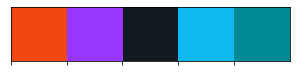

In [36]:
colors_dict = {
    "Africa": "#F1480F", 
    "Americas": "#9736FF", 
    "Asia": "#101820", 
    "Europe": "#0EB8F1", 
    "Oceania": "#008B97"
}

sns.palplot(["#F1480F", "#9736FF", "#101820", "#0EB8F1", "#008B97"])

In [37]:
continent_dict = dict(zip(countries.country, countries.region))

continent_dict["England"] = "Europe"
continent_dict["Scotland"] = "Europe"
continent_dict["Northern Ireland"] = "Europe"
continent_dict["Wales"] = "Europe"
continent_dict["Czechia"] = "Europe"

In [38]:
# list(expanded_df.columns)

In [39]:
list(pycountry.countries)[:10]

[Country(alpha_2='AW', alpha_3='ABW', flag='🇦🇼', name='Aruba', numeric='533'),
 Country(alpha_2='AF', alpha_3='AFG', flag='🇦🇫', name='Afghanistan', numeric='004', official_name='Islamic Republic of Afghanistan'),
 Country(alpha_2='AO', alpha_3='AGO', flag='🇦🇴', name='Angola', numeric='024', official_name='Republic of Angola'),
 Country(alpha_2='AI', alpha_3='AIA', flag='🇦🇮', name='Anguilla', numeric='660'),
 Country(alpha_2='AX', alpha_3='ALA', flag='🇦🇽', name='Åland Islands', numeric='248'),
 Country(alpha_2='AL', alpha_3='ALB', flag='🇦🇱', name='Albania', numeric='008', official_name='Republic of Albania'),
 Country(alpha_2='AD', alpha_3='AND', flag='🇦🇩', name='Andorra', numeric='020', official_name='Principality of Andorra'),
 Country(alpha_2='AE', alpha_3='ARE', flag='🇦🇪', name='United Arab Emirates', numeric='784'),
 Country(alpha_2='AR', alpha_3='ARG', flag='🇦🇷', name='Argentina', numeric='032', official_name='Argentine Republic'),
 Country(alpha_2='AM', alpha_3='ARM', flag='🇦🇲', 

In [40]:
countries = {}

for country in expanded_df.columns:    
    try:
        countries[country] = pycountry.countries.search_fuzzy(country)[0].alpha_2
    except:
        print(country)

Asia
Bonaire Sint Eustatius and Saba
Cape Verde
Democratic Republic of Congo
England
Europe
European Union
Faeroe Islands
High income
Laos
Low income
Lower middle income
North America
Northern Cyprus
Oceania
Scotland
South America
Upper middle income
World


In [41]:
countries["Asia"] = "AS"
countries["England"] = "GB"
countries["Europe"] = "EU"
countries["European Union"] = "EU"
countries["Bonaire Sint Eustatius and Saba"] = "BQ"
countries["Cape Verde"] = "CV"
countries["Democratic Republic of Congo"] = "CD"
countries["Faeroe Islands"] = "FO"
countries["Laos"] = "LA"
countries["Northern Cyprus"] = "CY"
countries["South Korea"] = "KR"
countries["North America"] = "NA" 
countries["Oceania"] = "OC"
countries["Scotland"] = "GB"
countries["South America"] = "SA"

In [42]:
for (key, item) in countries.items():
    if item == "GB":
        print(key)

Northern Ireland
United Kingdom
England
Scotland


In [43]:
countries["England"] = "GB-ENG"
countries["Northern Ireland"] = "GB-NIR"
countries["Scotland"] = "GB-SCT"
countries["Wales"] = "GB-WLS"

In [44]:
# expanded_df['High income']

In [45]:
expanded_df = expanded_df.drop('High income', axis=1)
expanded_df = expanded_df.drop('Low income', axis=1) 
expanded_df = expanded_df.drop('Lower middle income', axis=1) 
expanded_df = expanded_df.drop('Oceania', axis=1)
expanded_df = expanded_df.drop('Upper middle income', axis=1)
expanded_df = expanded_df.drop('World', axis=1)

In [46]:
%%time
img_dict = {}

for col in expanded_df.columns:
    img = Image.open(urllib.request.urlopen(f"https://raw.githubusercontent.com/google/region-flags/gh-pages/png/{countries[col]}.png"))
    img_dict[col] = img.convert("RGB")

CPU times: user 1.67 s, sys: 471 ms, total: 2.14 s
Wall time: 38.6 s


In [47]:
legend = []

for (continent, color) in colors_dict.items():
    legend.append(
        Patch(facecolor = color, edgecolor = "#101820", alpha = 0.8, label = continent)
    )

In [48]:
rank_df.shape , expanded_df.shape

((1181, 235), (1181, 229))

In [49]:
del_list = ['Asia', 'Europe', 'High income', 'Low income', 'Lower middle income','Oceania','Upper middle income','World',
'Africa',
'Bonaire Sint Eustatius and Saba',
'British Virgin Islands',
'Cote d\'Ivoire',
'Curacao',
'European Union',
'Faeroe Islands',
'Falkland Islands',
'North America',
'North Macedonia',
'Northern Cyprus',
'Saint Helena',
'South America',
'Timor']

exp_del_list = ['Asia', 'Europe',
                'Africa',
'Bonaire Sint Eustatius and Saba',
'British Virgin Islands',
'Cote d\'Ivoire',
'Curacao',
'European Union',
'Faeroe Islands',
'Falkland Islands',
'North America',
'North Macedonia',
'Northern Cyprus',
'Saint Helena',
'South America',
'Timor'
]

rank_df.drop(del_list, axis =1, inplace=True)
expanded_df.drop(exp_del_list, axis =1, inplace=True)

In [50]:
rank_df.shape, expanded_df.shape

((1181, 213), (1181, 213))

In [51]:
# print(rank_df['Asia'].head())
# print(expanded_df['Asia'].head())

# continent_dict

In [70]:
n_bars = 20

def get_bar_info(time):
    
    bar_location = rank_df.iloc[time].values
    top_filt = (bar_location > 0) & (bar_location < n_bars + 1)
    bar_location = bar_location[top_filt]
    bar_length = expanded_df.iloc[time].values[top_filt]
    cols = expanded_df.columns[top_filt]
    colors = [colors_dict[continent_dict[x]] for x in cols]
    
    return bar_location, bar_length, cols, colors

In [71]:
# expanded_df['North America', 'Africa']
# continent_dict
expanded_list = set(expanded_df.columns)
cont_list = set(continent_dict.keys())
# expanded_list - cont_list


for col in expanded_df.columns:
  if col not  in cont_list:
    print(col)

In [72]:
A, B, C, D = get_bar_info(111)
len(A), len(B), len(C), len(D)

(12, 12, 12, 12)

In [73]:
# expanded_df.tail()

### Plotting

In [74]:
def update(time):
        
    bar_location, bar_length, cols, colors = get_bar_info(time)
    # print(bar_location, bar_length, cols, colors)
    ax.clear()
    ax.set_facecolor("#E5E5E5")
    ax.tick_params(labelsize = 6)
    ax.grid(True, axis = "x", color = "#A4A4A4", linestyle = "--", alpha = 0.2)
    ax.set_axisbelow(True)
    [spine.set_visible(False) for spine in ax.spines.values()]
    ax.set_ylim(0.2, 20.8)
    
    ticks = ticker.FuncFormatter(lambda x, pos: "{0:g}".format(x / 1e6))
    ax.xaxis.set_major_formatter(ticks)

    ax.barh(
        y = bar_location,
        width = bar_length,
        tick_label = cols,
        height = 0.8,
        color = colors,
        edgecolor = "#101820",
        alpha = 0.8
    )
        
    for i, col in enumerate(cols):
        
        img = img_dict[col]
        img = img.resize((100, 100))
        im = OffsetImage(img, zoom = 0.1)
        im.image.axes = ax

        ab = AnnotationBbox(
            im,
            (bar_length[i], bar_location[i]), 
            xybox = (-20, 0),
            frameon = False, 
            xycoords = "data",
            boxcoords = "offset points",
            pad = 0)
        
        ax.text(bar_length[i] + max(bar_length) / 100, bar_location[i] + 0.3, "{:,}".format(int(bar_length[i])), size = 5)

        ax.add_artist(ab)

    date = expanded_df.index[time].strftime("%d %B, %Y")
    ax.text(0.95, 0.4, date, transform = ax.transAxes, color = "#101820", size = 22, ha = "right", weight = 800)
    
    total_vaccination = expanded_df.iloc[time].sum()
    ax.text(0.95, 0.3, "Total Vaccination for World:    {:,}".format(int(total_vaccination)), 
            transform = ax.transAxes, color = "#101820", size = 6, ha = "right", weight = 400)
    
    ax.text(1.05, 0, "Millions", transform = ax.transAxes, color = "#101820", size = 5, ha = "right", weight = 400)
    
    ax.legend(handles = legend, bbox_to_anchor=(-0.01, 0.95, 0.33, 0.1), ncol = 5,
              fontsize = 4.5, facecolor = "#E5E5E5", edgecolor = "#E5E5E5")

    ax.set_title("COVID-19 World Vaccination Progress\n")
    ax.invert_yaxis()
    ax.yaxis.set_tick_params(pad = 20)

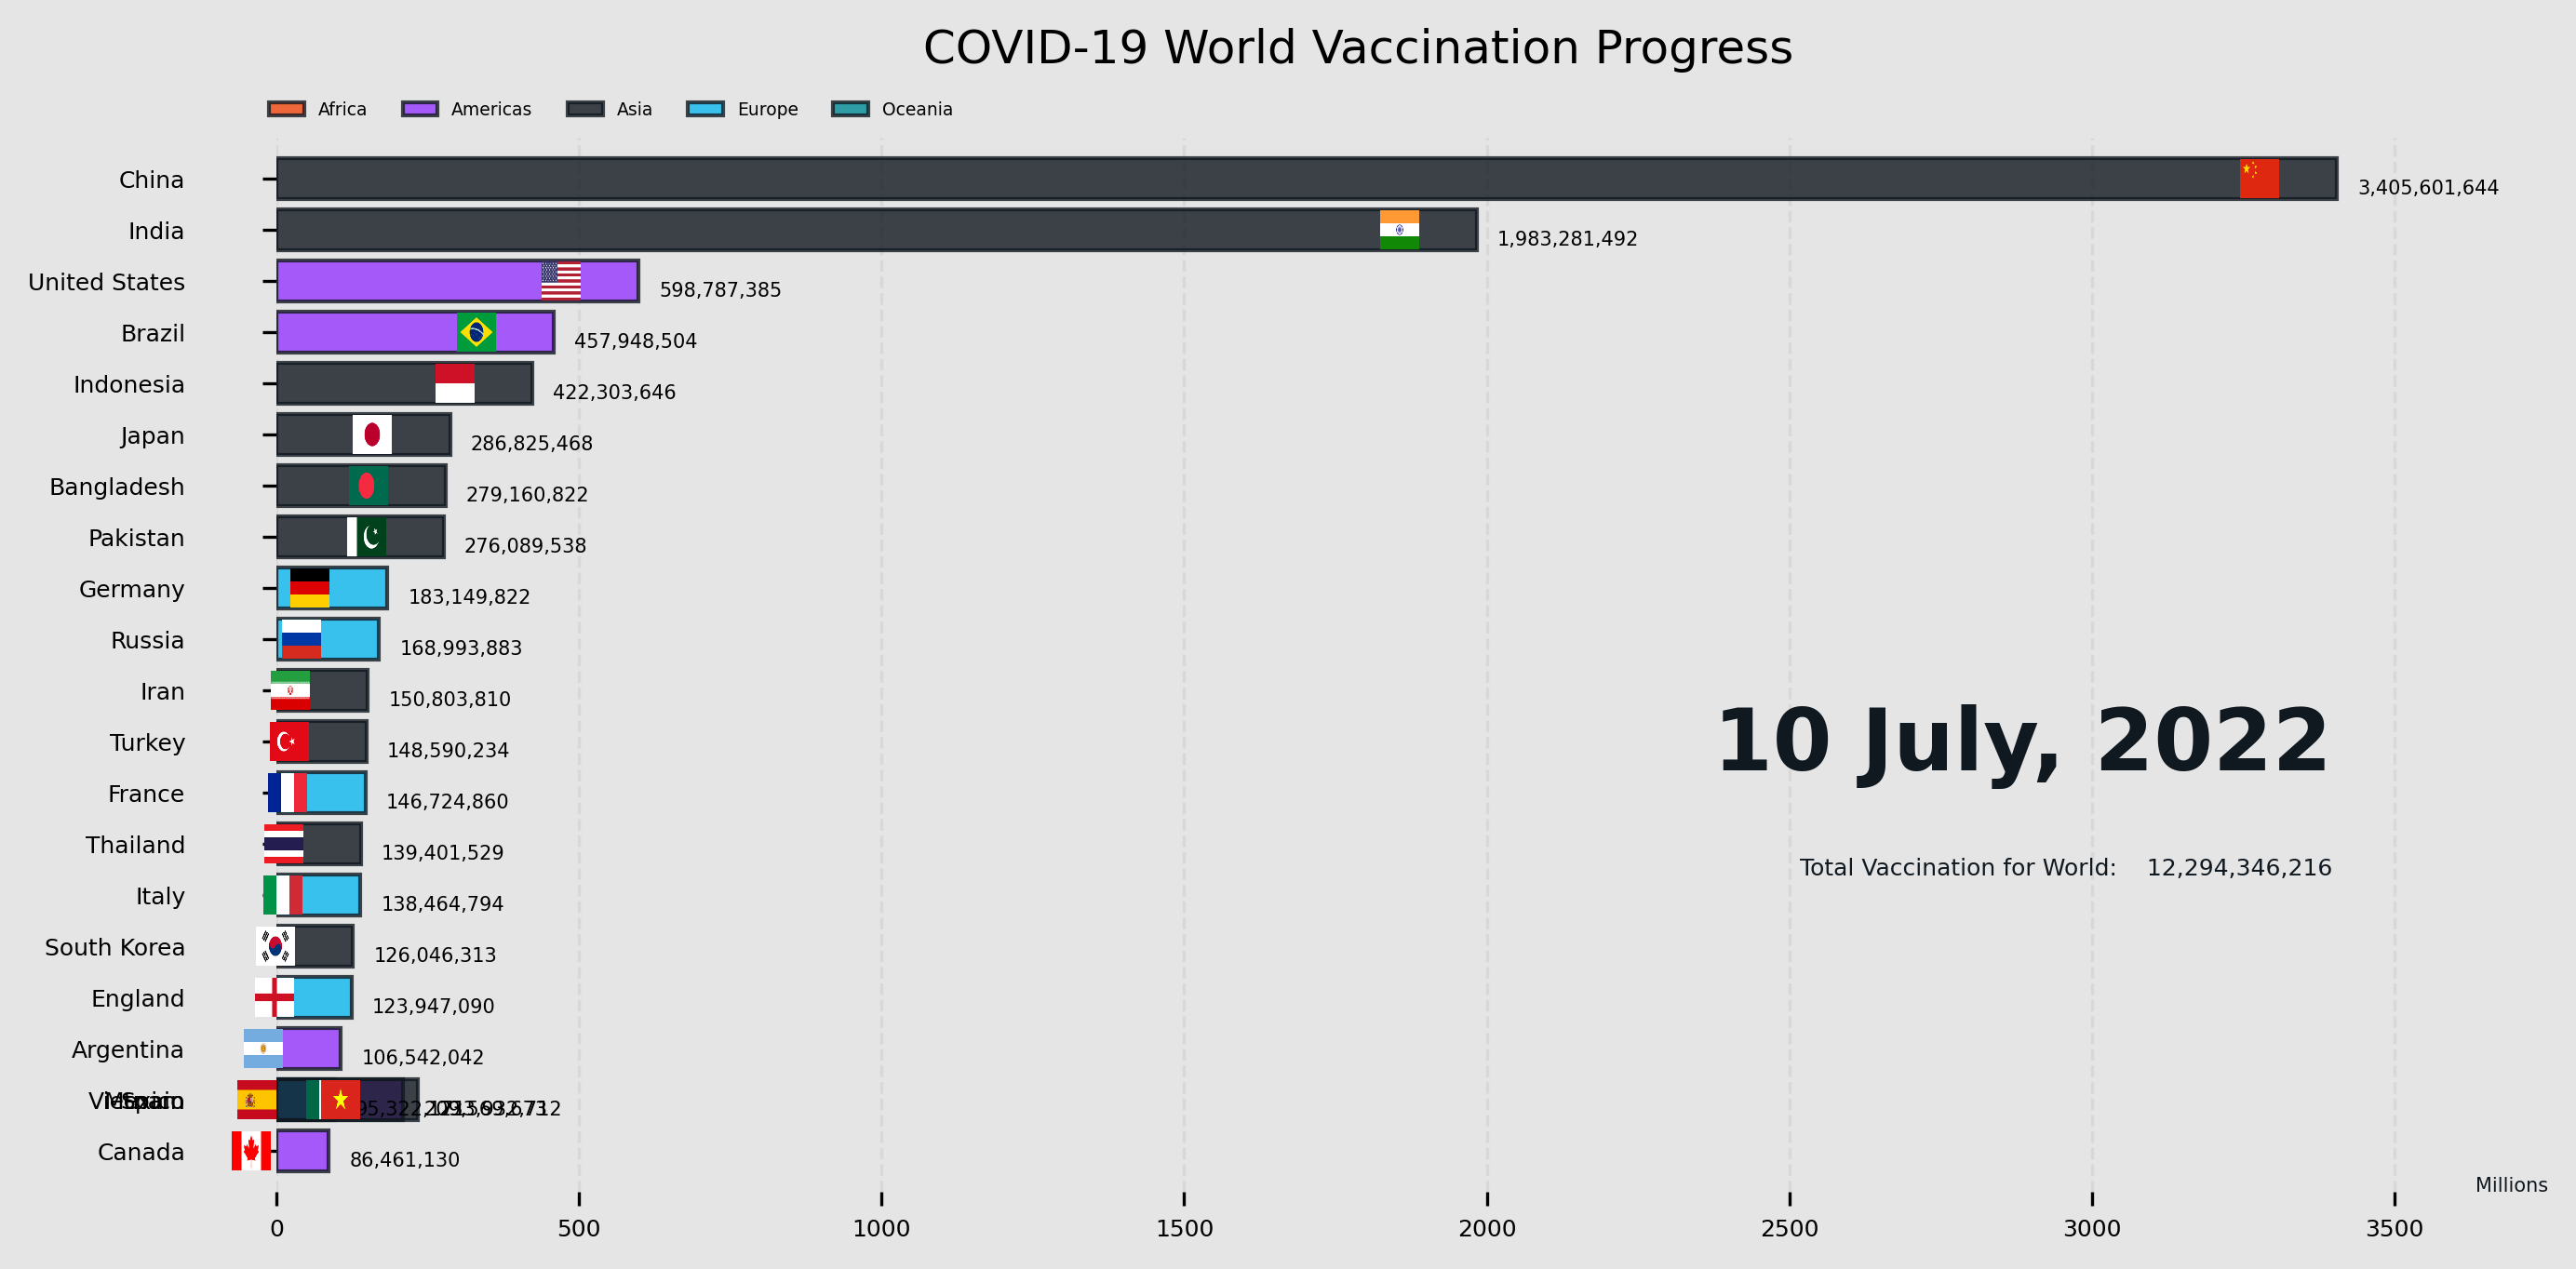

In [94]:
import time
fig, ax = plt.subplots(figsize = (10, 5), dpi = 300, facecolor = "#E5E5E5")

# for t in range(600, 1170, 2):
#   # update(1170)  
#   update(t)
#   time.sleep(3)
update(1170)  

In [76]:
plt.show()

### Animation

In [77]:
fig, ax = plt.subplots(figsize = (10, 5), dpi = 300, facecolor = "#E5E5E5")

plt.close()

animator = FuncAnimation(
    fig, 
    update, 
    frames = range(16, len(expanded_df)), 
    interval = 100, 
    repeat = True, 
    save_count = range(16, len(expanded_df))
)

In [78]:
%%time
video_html = animator.to_html5_video().replace('width="3000"', 'width="800"').replace('height="1500"', 'height="400"')
HTML(video_html)


CPU times: user 7min 14s, sys: 13.9 s, total: 7min 28s
Wall time: 7min 52s


In [81]:
HTML(video_html)

Output hidden; open in https://colab.research.google.com to view.

In [79]:
# HTML(video_html)


# NB Run time

In [80]:
end_time = datetime.datetime.now()
print("Time taken to run the notebook : ", end_time - start_time)

Time taken to run the notebook :  0:34:55.824077
